In [2]:
from matplotlib.image import imread
import matplotlib.pyplot as plt
import numpy as np
import os
plt.rcParams['figure.figsize'] = [16, 8]


#A = imread(os.path.join('..','DATA','dog.jpg'))
A = imread('jelly.jpg')
X = np.mean(A, -1); # Convert RGB to grayscale

img = plt.imshow(X)
img.set_cmap('gray')
plt.axis('off')
plt.show()

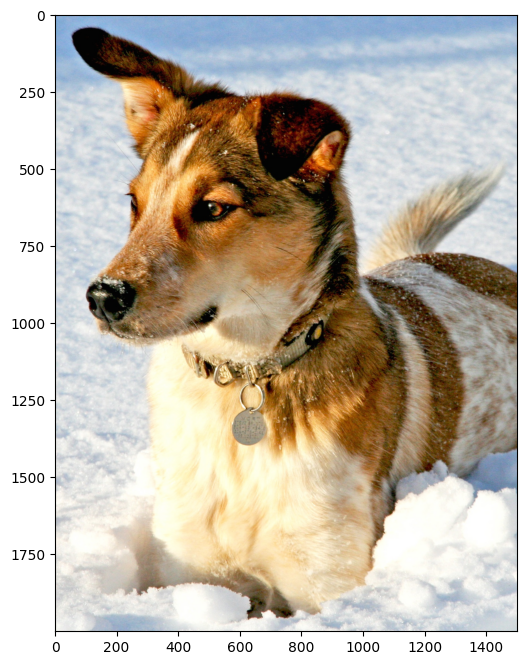

In [3]:
plt.imshow(A)

In [17]:
U, S, VT = np.linalg.svd(A.transpose((2,0,1)), full_matrices=False)

In [3]:
U, S, VT = np.linalg.svd(X,full_matrices=False)
S = np.diag(S)

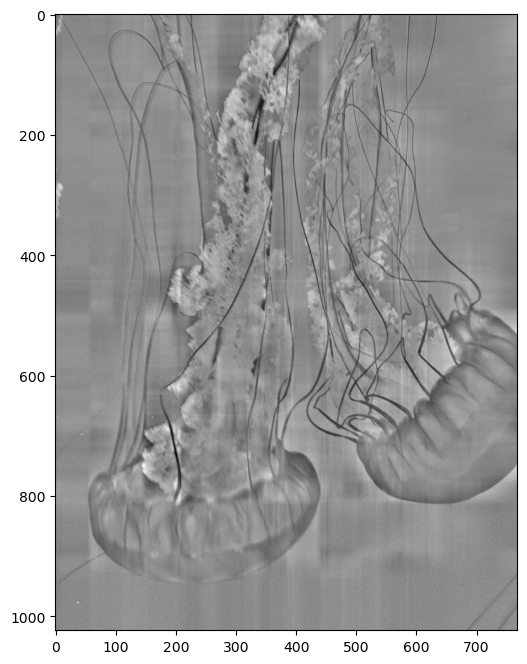

In [4]:
rmin = 5
rmax = -1
Xapprox = U[:,rmin:rmax] @ S[rmin:rmax,rmin:rmax] @ VT[rmin:rmax,:]
plt.imshow(Xapprox, cmap = 'gray')

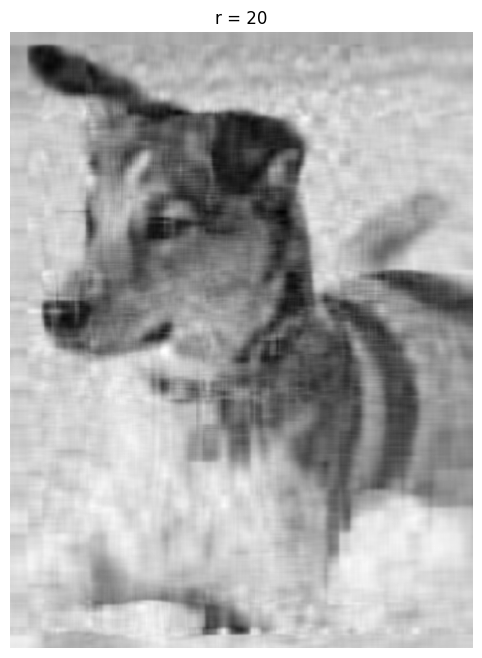

In [61]:

j = 0
for r in (5, 10, 20):
    # Construct approximate image
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    plt.figure(j+1)
    j += 1
    img = plt.imshow(Xapprox)
    img.set_cmap('gray')
    plt.axis('off')
    plt.title('r = ' + str(r))
    plt.show()

In [46]:
normdiffs = []
norm = np.linalg.norm(X)
for r in range(50):
    Xapprox = U[:,:r] @ S[0:r,:r] @ VT[:r,:]
    normdiffs.append(np.linalg.norm((X-Xapprox).flatten())/norm)

In [50]:
## f_ch01_ex02_2

plt.figure(1)
plt.semilogy(np.diag(S))
plt.title('Singular Values')
plt.show()

plt.figure(2)
plt.plot(np.cumsum(np.diag(S)**2)/np.sum(np.diag(S)**2))
plt.plot(1-np.array(normdiffs)[1:]**2)
plt.xlim(-1, 100)
plt.title('Singular Values: Cumulative Sum')
plt.show()

In [53]:
from sklearn.decomposition import  TruncatedSVD

In [63]:
tsvd = TruncatedSVD(1499)
Xapprox = tsvd.fit_transform(X)

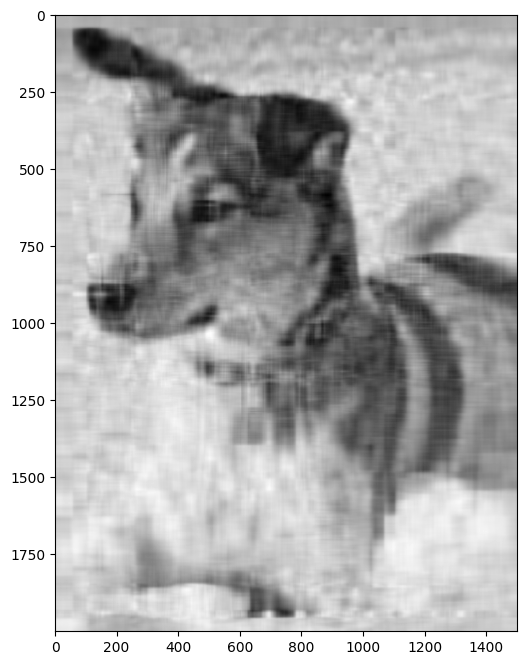

In [60]:
plt.imshow(Xapprox @ tsvd.components_, cmap='gray')

In [56]:
Xapprox.shape

(2000, 20)